# Reproducing Figure 2A-D

Figure 2 presents results from sensitivity analysis of configuration 1.

## Parameters

In these figures, we vary:

* **Number of outpatients per day**:
    * 170 (same as config 4)
    * 85
    * 65
* **Average service time for outpatients** - mean (SD):
    * 0.87 (0.21) (same as config 1)
    * 2.5 (0.5)
    * 5 (1)

To calculate inter-arrival times from those numbers per day, based on article description and the provided patient counts and equivalent IAT, understand the method for calculation to be **round(60/(n/8.5))**,  where n is the number of arrivals per day. As such...

In [12]:
# Calculation of inter-arrival times
print(f'For 170 outpatients, use IAT (rounded to nearest int): {60/(170/8.5)}')
print(f'For 85 outpatients, use IAT (rounded to nearest int): {60/(85/8.5)}')
print(f'For 65 outpatients, use IAT (rounded to nearest int): {60/(65/8.5)}')

For 170 outpatients, use IAT (rounded to nearest int): 3.0
For 85 outpatients, use IAT (rounded to nearest int): 6.0
For 65 outpatients, use IAT (rounded to nearest int): 7.846153846153846


## Set up

In [13]:
# To run model
import PHC

# To import results and produce figures
import xlrd
import pandas as pd
import os
import matplotlib.pyplot as plt

In [14]:
# Paths to save image files to
output_folder = 'outputs'
fig2a_path = os.path.join(output_folder, 'fig2a.png')
fig2b_path = os.path.join(output_folder, 'fig2b.png')
fig2c_path = os.path.join(output_folder, 'fig2c.png')
fig2d_path = os.path.join(output_folder, 'fig2d.png')

## Run model

As this is a variation on configuration 1 (which is the default parameters in PHC.py), we just need to input the varying number of outpatients and service time.

In [15]:
# TODO: Run with 100 replications

# To produce Figure 2B

arr170 = {
    'OPD_iat': 3,
    'rep_file': 'arr170.xls',
}

arr85 = {
    'OPD_iat': 6,
    'rep_file': 'arr85.xls',
}

arr65 = {
    'OPD_iat': 8,
    'rep_file': 'arr65.xls',
}

serv087 = {
    'mean': 0.87,
    'sd': 0.21,
    'consult_boundary_1': 0.5,  # From PHC.py
    'consult_boundary_2': 0.3,  # From PHC.py
}

serv25 = {
    'mean': 2.5,
    'sd': 0.5
#   'consult_boundary_1': ,  # What is it?
#   'consult_boundary_2': ,  # What is it?
}

serv5 = {
    'mean': 5,
    'sd': 1,
    'consult_boundary_1': 2,  # From config 4
    'consult_boundary_2': 2,  # From config 4
}

# To produce Figure 2C, combine the arr dictionaries with the serv5 dict
arr_dict = [arr170, arr85, arr65]
arr_serv5_dict = []
for d in arr_dict:
    # Combine the dictionaries
    comb = {**d, **serv5}
    # Replace the file name
    comb['rep_file'] = comb['rep_file'].replace('.', '_serv5.')
    # Save to list
    arr_serv5_dict.append(comb)
display(arr_serv5_dict)

[{'OPD_iat': 3,
  'rep_file': 'arr170_serv5.xls',
  'mean': 5,
  'sd': 1,
  'consult_boundary_1': 2,
  'consult_boundary_2': 2},
 {'OPD_iat': 6,
  'rep_file': 'arr85_serv5.xls',
  'mean': 5,
  'sd': 1,
  'consult_boundary_1': 2,
  'consult_boundary_2': 2},
 {'OPD_iat': 8,
  'rep_file': 'arr65_serv5.xls',
  'mean': 5,
  'sd': 1,
  'consult_boundary_1': 2,
  'consult_boundary_2': 2}]

In [16]:
# Input configuration parameters to main() (have to append with 's_', and
# add ** as inputting dict as parameters)
#for config in arr_serv5_dict:
#    print(f'''Running: {config['rep_file']}''')
#    PHC.main(**{f's_{k}': v for k, v in config.items()})

## Create Figure 2B

Import and process data

In [17]:
# List of files to loop through
files = ['arr170', 'arr85', 'arr65']

# Empty list to store results
result_list = []

for f in files:
    # Import .xls and convert to pandas dataframe
    book = xlrd.open_workbook(os.path.join(output_folder, f'{f}.xls'))
    result = pd.read_excel(book, header=None, index_col=0)

    # Find mean from the replication
    # Save as dataframe, dropping the duplicate rows (NCD occ twice)
    res = pd.DataFrame({
        f.replace('arr', ''): result.mean(axis=1)
    }).drop_duplicates()

    # Remove index name
    res.index.name = None

    # Save to list
    result_list.append(res)

# Combine into single dataframe
summary = pd.concat(result_list, axis=1)

Produce figure

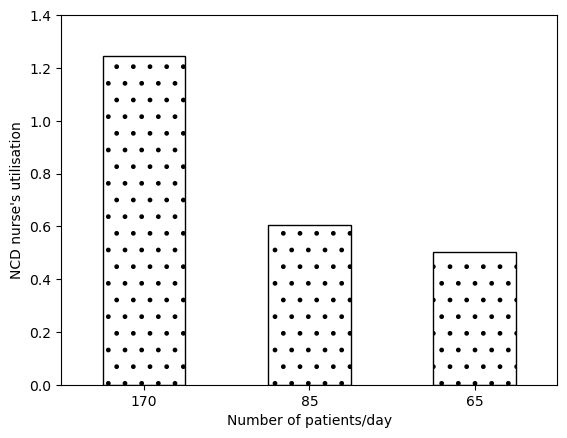

In [18]:
summary.loc['NCD occ'].plot.bar(edgecolor='black', color='white', hatch='.')
plt.xlabel('Number of patients/day')
plt.ylabel('''NCD nurse's utilisation''')
plt.ylim(0, 1.4)
plt.xticks(rotation=0)
plt.savefig(fig2b_path, bbox_inches='tight')
plt.show()

## Create Figure 2C

Import and process data

In [19]:
# List of files to loop through
files = ['arr170_serv5', 'arr85_serv5', 'arr65_serv5']

# Empty list to store results
result_list = []

for f in files:
    # Import .xls and convert to pandas dataframe
    book = xlrd.open_workbook(os.path.join(output_folder, f'{f}.xls'))
    result = pd.read_excel(book, header=None, index_col=0)

    # Find mean from the replication
    # Save as dataframe, dropping the duplicate rows (NCD occ twice)
    res = pd.DataFrame({
        f.replace('arr', '').replace('_serv5', ''): result.mean(axis=1)
    }).drop_duplicates()

    # Remove index name
    res.index.name = None

    # Save to list
    result_list.append(res)

# Combine into single dataframe
summary = pd.concat(result_list, axis=1)

Produce figure

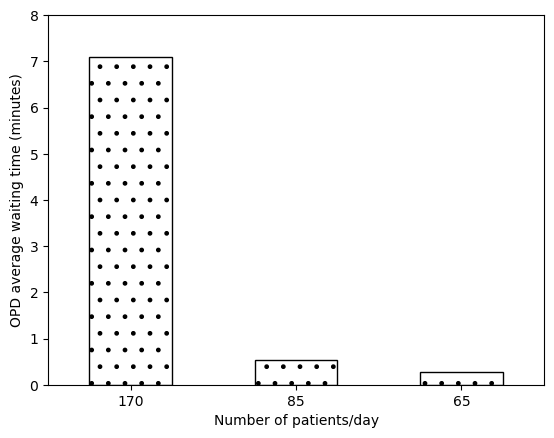

In [20]:
summary.loc['OPD Q wt'].plot.bar(edgecolor='black', color='white', hatch='.')
plt.xlabel('Number of patients/day')
plt.ylabel('''OPD average waiting time (minutes)''')
plt.xticks(rotation=0)
plt.ylim(0, 8)
plt.savefig(fig2c_path, bbox_inches='tight')
plt.show()